Q1. Problem Statement: Hierarchical Clustering

Load   the "Country-data.csv" dataset   into   a   DataFrame   and   perform   the followingtasks:

1.Create  a  separate DataFrame  with  only  numeric  data  by  removingthe "country"column

2.Scale the data using the Standard Scaler to create a scaled DataFrame

3.Plotting dendrograms with the complete linkage method

4.Creating cluster labels using cut tree

5.Perform the 4-Component PCA on DataFrame

6.Now, from final the DataFrame, analyze how the low GDP rate corresponds tothe child mortality rate around the worldDataset:


In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
%matplotlib inline
import seaborn as sns

Load   the "Country-data.csv" dataset   into   a   DataFrame   and   perform   the followingtasks:


In [ ]:
df=pd.read_csv('Country-data.csv')
df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200



1.Create  a  separate DataFrame  with  only  numeric  data  by  removing
 the "country"column




In [ ]:
df=df.drop(['country'],axis=1)
df.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


2.Scale the data using the Standard Scaler to create a scaled DataFrame


In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
ss=StandardScaler()
scaled=ss.fit_transform(df)
scaled

array([[ 1.29153238, -1.13827979,  0.27908825, ..., -1.61909203,
         1.90288227, -0.67917961],
       [-0.5389489 , -0.47965843, -0.09701618, ...,  0.64786643,
        -0.85997281, -0.48562324],
       [-0.27283273, -0.09912164, -0.96607302, ...,  0.67042323,
        -0.0384044 , -0.46537561],
       ...,
       [-0.37231541,  1.13030491,  0.0088773 , ...,  0.28695762,
        -0.66120626, -0.63775406],
       [ 0.44841668, -0.40647827, -0.59727159, ..., -0.34463279,
         1.14094382, -0.63775406],
       [ 1.11495062, -0.15034774, -0.33801514, ..., -2.09278484,
         1.6246091 , -0.62954556]])

In [ ]:
df1=pd.DataFrame(scaled,columns=df.columns)
df1

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,1.291532,-1.138280,0.279088,-0.082455,-0.808245,0.157336,-1.619092,1.902882,-0.679180
1,-0.538949,-0.479658,-0.097016,0.070837,-0.375369,-0.312347,0.647866,-0.859973,-0.485623
2,-0.272833,-0.099122,-0.966073,-0.641762,-0.220844,0.789274,0.670423,-0.038404,-0.465376
3,2.007808,0.775381,-1.448071,-0.165315,-0.585043,1.387054,-1.179234,2.128151,-0.516268
4,-0.695634,0.160668,-0.286894,0.497568,0.101732,-0.601749,0.704258,-0.541946,-0.041817
...,...,...,...,...,...,...,...,...,...
162,-0.225578,0.200917,-0.571711,0.240700,-0.738527,-0.489784,-0.852161,0.365754,-0.546913
163,-0.526514,-0.461363,-0.695862,-1.213499,-0.033542,3.616865,0.546361,-0.316678,0.029323
164,-0.372315,1.130305,0.008877,1.380030,-0.658404,0.409732,0.286958,-0.661206,-0.637754
165,0.448417,-0.406478,-0.597272,-0.517472,-0.658924,1.500916,-0.344633,1.140944,-0.637754



3.Plotting dendrograms with the complete linkage method


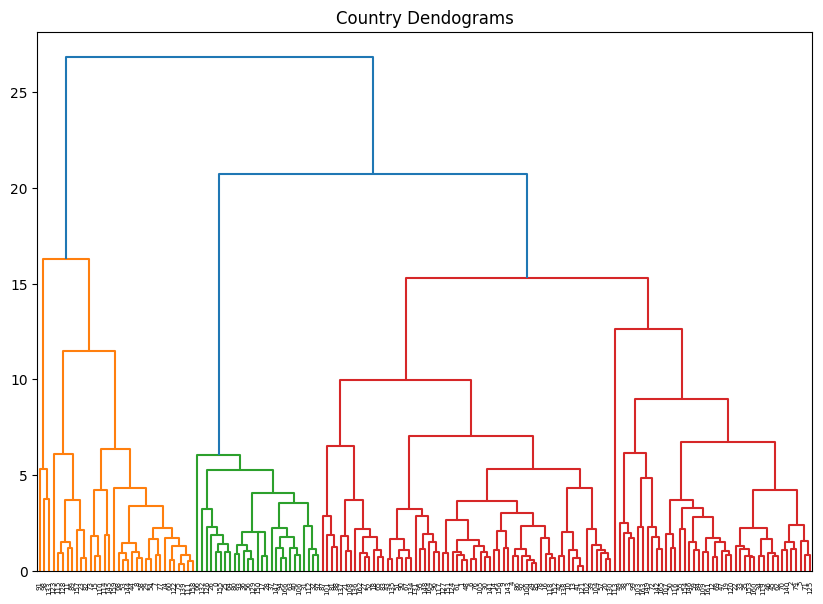

In [ ]:
import scipy.cluster.hierarchy as sch
plt.figure(figsize=(10,7))
plt.title("Country Dendograms")
dend = sch.dendrogram(sch.linkage(df1, method='ward'))

In [ ]:
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram

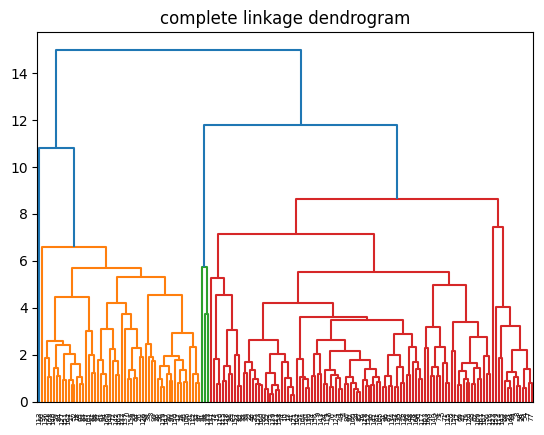

In [ ]:
clt=linkage(df1,method='complete',metric='euclidean')
plt.title('complete linkage dendrogram')
dendrogram(clt)
plt.show()


4.Creating cluster labels using cut tree


In [ ]:
from scipy.cluster.hierarchy import cut_tree


In [ ]:
cl_cluster_labels=cut_tree(clt,n_clusters=4).reshape(-1,)
cl_cluster_labels

array([0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0,
       1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0,
       0, 1, 1, 2, 1, 0, 0, 1, 1, 0, 2, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 1, 0, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1,
       0, 2, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0])

In [ ]:
df1['Hierarchical_cluster_labels']=cl_cluster_labels
df1

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,Hierarchical_cluster_labels
0,1.291532,-1.138280,0.279088,-0.082455,-0.808245,0.157336,-1.619092,1.902882,-0.679180,0
1,-0.538949,-0.479658,-0.097016,0.070837,-0.375369,-0.312347,0.647866,-0.859973,-0.485623,1
2,-0.272833,-0.099122,-0.966073,-0.641762,-0.220844,0.789274,0.670423,-0.038404,-0.465376,1
3,2.007808,0.775381,-1.448071,-0.165315,-0.585043,1.387054,-1.179234,2.128151,-0.516268,0
4,-0.695634,0.160668,-0.286894,0.497568,0.101732,-0.601749,0.704258,-0.541946,-0.041817,1
...,...,...,...,...,...,...,...,...,...,...
162,-0.225578,0.200917,-0.571711,0.240700,-0.738527,-0.489784,-0.852161,0.365754,-0.546913,0
163,-0.526514,-0.461363,-0.695862,-1.213499,-0.033542,3.616865,0.546361,-0.316678,0.029323,1
164,-0.372315,1.130305,0.008877,1.380030,-0.658404,0.409732,0.286958,-0.661206,-0.637754,1
165,0.448417,-0.406478,-0.597272,-0.517472,-0.658924,1.500916,-0.344633,1.140944,-0.637754,0



5.Perform the 4-Component PCA on DataFrame



In [ ]:
from sklearn.decomposition import IncrementalPCA
pca_final=IncrementalPCA(n_components=4)
pca=pca_final.fit_transform(df1)
print(df.shape)
print(pca.shape)

(167, 9)
(167, 4)


In [ ]:
p4=pd.DataFrame(pca,columns=['PC1','PC2','PC3','PC4'])
p4

,PC1,PC2,PC3,PC4
0,-3.007595,0.115587,0.806948,0.914579
1,0.480070,-0.600105,0.184976,-1.209703
2,-0.206833,-0.505375,-1.334992,-0.734276
3,-3.004808,1.661604,-1.459947,1.025992
4,1.067505,0.127473,0.109030,-0.859099
...,...,...,...,...
162,-0.938465,0.655347,0.364337,-0.678574
163,-0.428606,-1.284530,-3.008470,0.131581
164,0.548458,1.391305,0.075456,-1.198365
165,-1.961629,-0.112695,-1.005986,0.189834


In [ ]:
p4['Hierarchical_cluster_labels']=cl_cluster_labels
p4

,PC1,PC2,PC3,PC4,Hierarchical_cluster_labels
0,-3.007595,0.115587,0.806948,0.914579,0
1,0.480070,-0.600105,0.184976,-1.209703,1
2,-0.206833,-0.505375,-1.334992,-0.734276,1
3,-3.004808,1.661604,-1.459947,1.025992,0
4,1.067505,0.127473,0.109030,-0.859099,1
...,...,...,...,...,...
162,-0.938465,0.655347,0.364337,-0.678574,0
163,-0.428606,-1.284530,-3.008470,0.131581,1
164,0.548458,1.391305,0.075456,-1.198365,1
165,-1.961629,-0.112695,-1.005986,0.189834,0


6.Now, from final the DataFrame, analyze how the low GDP rate corresponds tothe child mortality rate around the world.

Text(0.5, 1.0, 'How  low  GDP  rate  corresponds  to thechild mortality rate ')

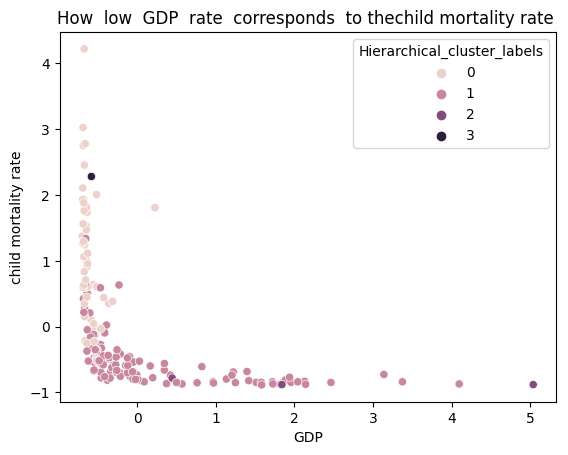

In [ ]:
ax=sns.scatterplot(x='gdpp',y='child_mort',data=df1,hue='Hierarchical_cluster_labels')
ax.set_xlabel('GDP',fontsize=10)
ax.set_ylabel('child mortality rate',fontsize=10)
ax.set_title('How  low  GDP  rate  corresponds  to thechild mortality rate ')